In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the cleaned DataFrame
cleaned_df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/cleaned_data.csv")

In [3]:
cleaned_df.head()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [4]:
# print out the shape of this dataframe to note the number of samples

cleaned_df.shape

(28362, 18)

# K Means Clustering Without Scaling

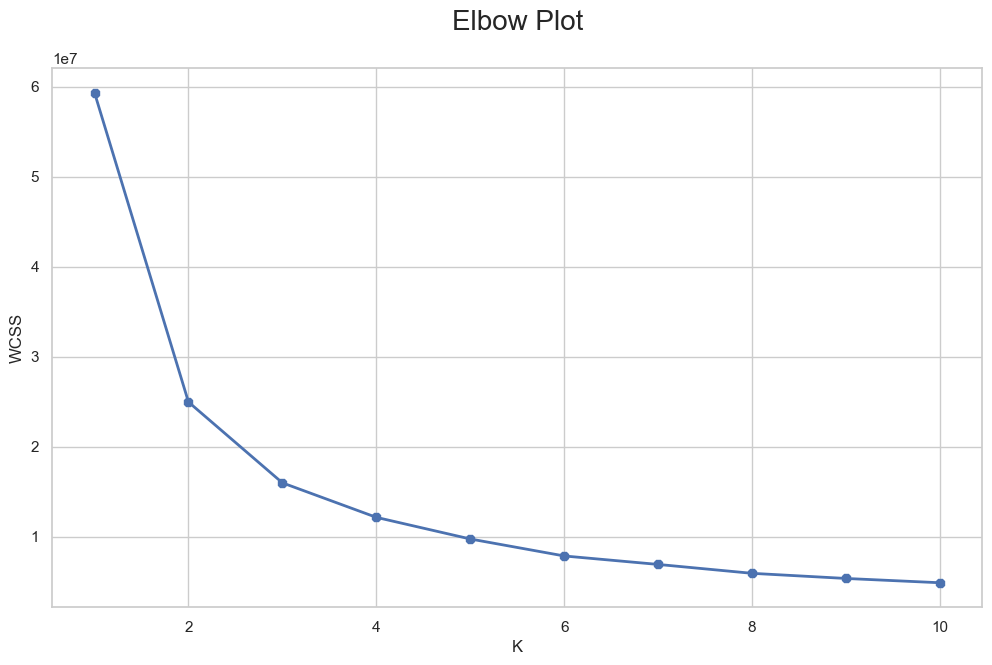

In [5]:
# create an Elbow Plot of WCSS

X1 = cleaned_df.loc[:, ['release_date', 'len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

sns.set(style='whitegrid') # to show gridlines
plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

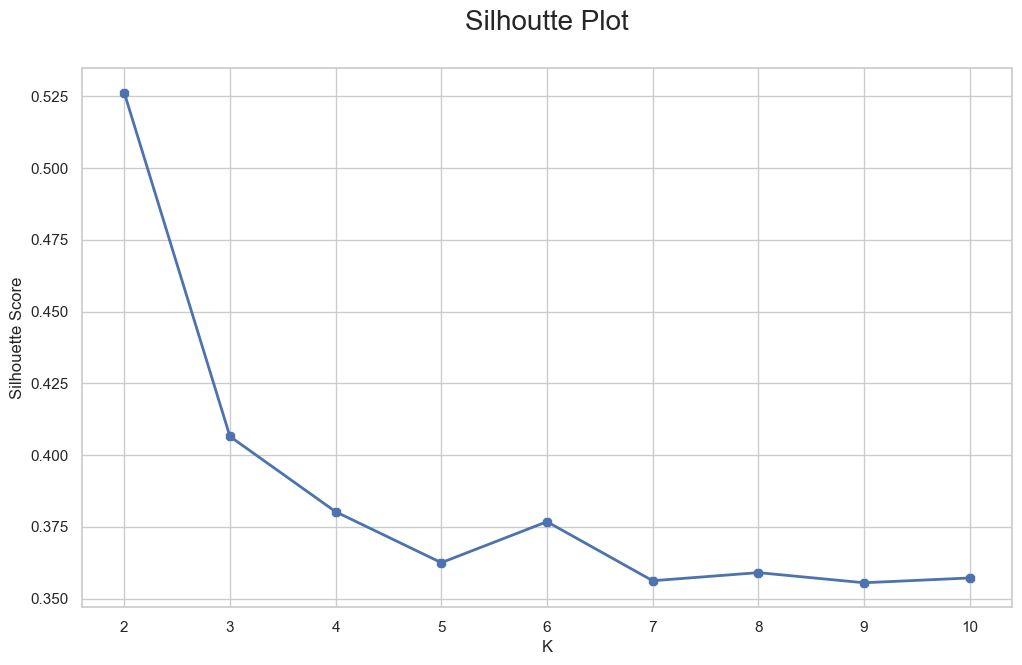

In [6]:
# create a plot of Silhoutte Score

silhouette = []
for k in range(2, 11):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

According to the Elbow and Silhouette plots, 6 is the best number of clusters. K=6

In [7]:
# create a KMeans object with this optimal number of clusters. Name this object `kmeans`

kmeans = KMeans(n_clusters = 6)

# fit this KMeans object using your `X1` data

kmeans.fit(X1)

KMeans(n_clusters=6)

In [8]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([4, 1, 1, ..., 5, 5, 5], dtype=int32)

In [9]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[1.99693111e+03, 1.16077337e+02, 2.06048094e-02, 1.46429354e-01,
        1.01506561e-01, 5.39684296e-02, 2.18979191e-02, 1.70608545e-02,
        2.93815289e-02, 6.98113984e-02, 1.43315415e-01, 4.98248499e-02,
        6.11482959e-02, 4.62996707e-02, 2.61408365e-02, 9.55128874e-02,
        3.00717711e-02, 3.29555515e-01],
       [1.96933671e+03, 3.61762122e+01, 2.48413482e-02, 6.88300445e-02,
        1.44649738e-01, 6.12310017e-02, 1.22494331e-02, 1.83896506e-02,
        8.96428667e-02, 8.25849724e-02, 3.42480486e-02, 8.17095227e-02,
        3.16624670e-02, 5.43343160e-02, 2.42063621e-02, 1.63096086e-01,
        3.29410004e-02, 7.23761253e-01],
       [2.00233316e+03, 3.86378036e+01, 1.89711545e-02, 1.29715605e-01,
        1.33979924e-01, 6.01888482e-02, 1.52443236e-02, 1.45437158e-02,
        4.89116710e-02, 8.22776211e-02, 5.59137106e-02, 5.63313119e-02,
        3.42942031e-02, 5.00757474e-02, 2.33932473e-02, 1.52489690e-01,
        3.25490509e-02, 2.52383467e-01],
       [1.998

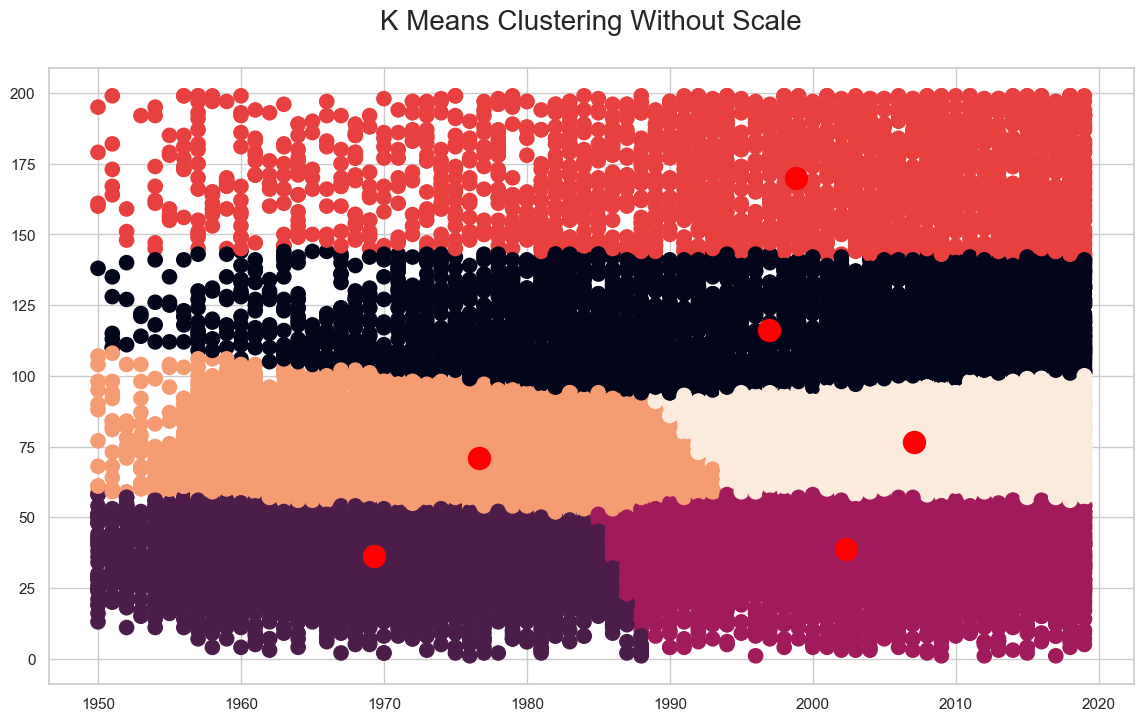

In [10]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering Without Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# K Means Clustering with Scaling

In [11]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

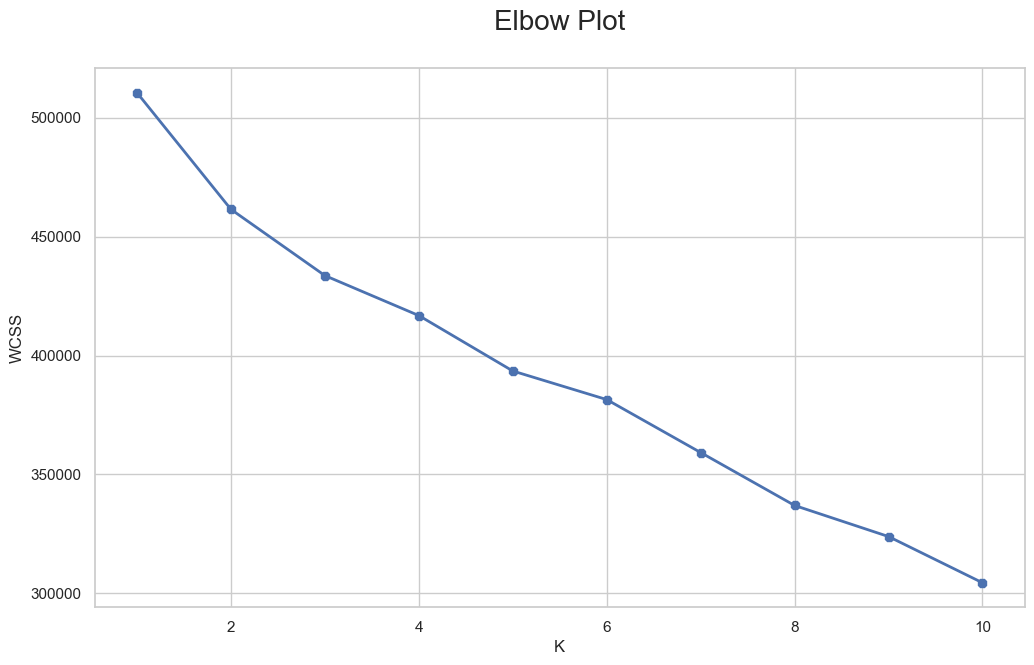

In [12]:
wcss_scaled = []
for k in range(1, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')

    # fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

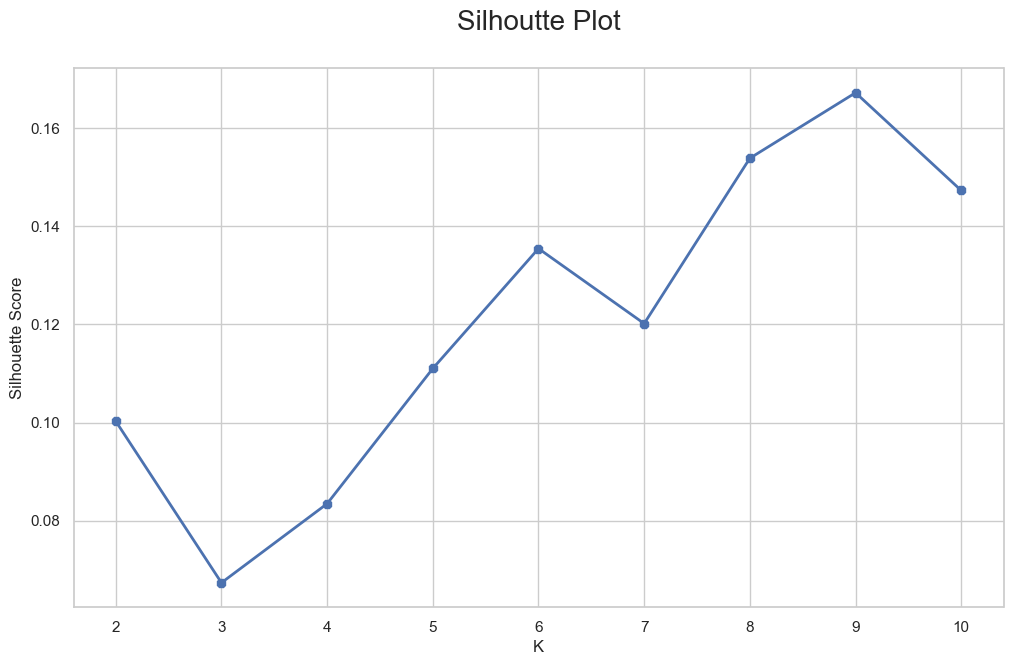

In [13]:
# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 11):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [14]:
# create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = KMeans(n_clusters = 2)

# fit this KMeans object on your data

kmeans.fit(X1_scaled)

KMeans(n_clusters=10)

In [15]:
#nGenerate labels for the  dataset

labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
# output the centroids of your clusters

kmeans_scaled.cluster_centers_

array([[-0.82893487, -0.38524315,  0.09187086, -0.26428486,  0.08062312,
         0.06288873, -0.1099735 ,  0.05436518,  0.23979284,  0.02499475,
        -0.30815275,  0.19000154, -0.0705007 ,  0.07633974,  0.00692991,
         0.16814687,  0.04450912,  0.82893487],
       [ 0.77203556,  0.35879949, -0.08556471,  0.24614396, -0.07508903,
        -0.05857196,  0.10242476, -0.05063347, -0.2233331 , -0.02327907,
         0.28700069, -0.17695956,  0.06566143, -0.07109967, -0.00645423,
        -0.15660502, -0.04145394, -0.77203556]])

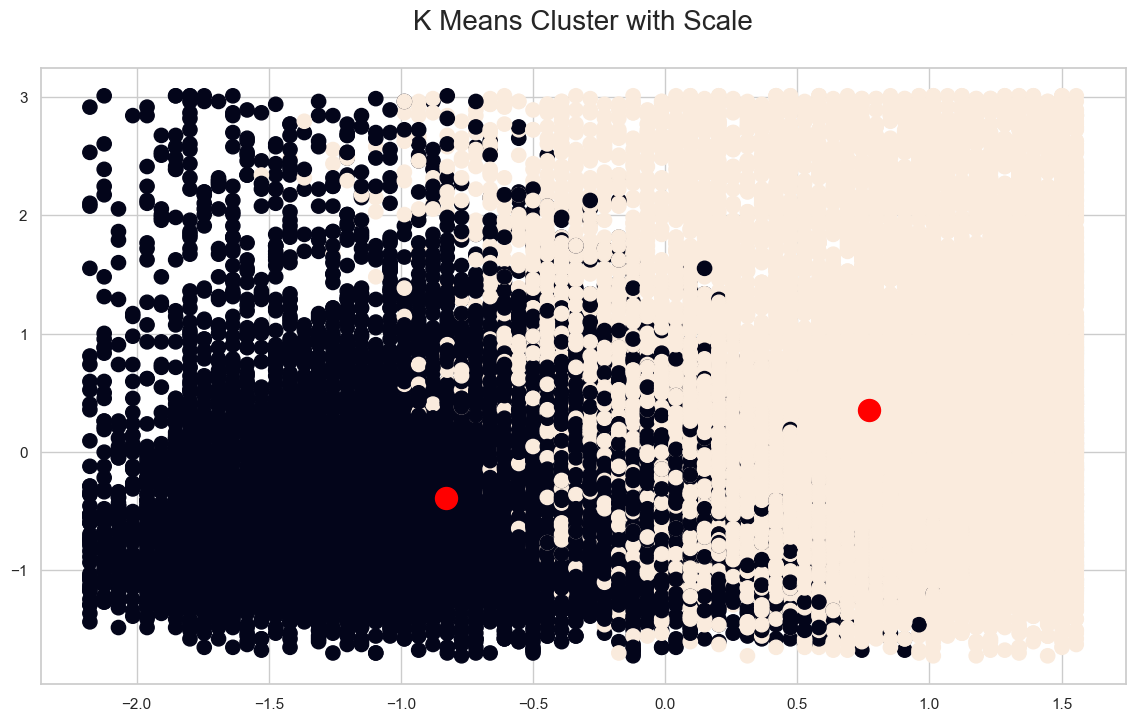

In [19]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Cluster with Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()